In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
file = pd.read_csv("scopus.csv")

In [26]:
print(file.columns)
print(file.shape)

# Which columns are the important ones?

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Correspondence Address',
       'Editors', 'Publisher', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')
(17, 33)


In [27]:
file["Index Keywords"]

0     Artificial intelligence; Managers; Risk manage...
1     Intelligent systems; Managers; Regression anal...
2     Agriculture; Artificial intelligence; Big data...
3     information and communication technology; logi...
4                                                   NaN
5     Supply chain management; AI techniques; Black ...
6                                                   NaN
7     Decision making; Decision trees; Forestry; Int...
8     artificial intelligence; consumption behavior;...
9     Artificial intelligence; Decision trees; Deter...
10    Artificial intelligence; Formal verification; ...
11    Big data; Data mining; Risk assessment; Risk m...
12    Artificial intelligence; Industrial management...
13    Agent-based decision support systems; Automate...
14    Analysis results; Analytical Hierarchy Process...
15                                                  NaN
16    Aggregates; Artificial intelligence; Chains; C...
Name: Index Keywords, dtype: object

In [28]:
file["Author Keywords"]

0     Artificial Intelligence (AI); Big data; Explai...
1     Counterfactual explanation; Recommender system...
2     big data; causal graph; demand and supply anal...
3     Food supply chain; Food sustainability; Food w...
4     Explainable AI; Human-computer interface; Mach...
5     Artificial intelligence; Explainable AI; Integ...
6     Bayesian Network; business partner recommendat...
7     explainable AI; extreme gradient boosting (XGB...
8     AI-push; Consumers' preference for products; E...
9     Decision tree; Explainable artificial intellig...
10    Basic supply chain patterns; Event-B; Formal V...
11    Association rule mining; Supply chain manageme...
12    After-sales; Case study; Decision support; Fie...
13    Data mining; Knowledge extraction and manageme...
14    Analytical hierarchy process; Gray relational ...
15    Control systems; Intelligent agents; Process m...
16                                                  NaN
Name: Author Keywords, dtype: object

In [29]:
file["Index Keywords"][1]

'Intelligent systems; Managers; Regression analysis; Supply chain management; Counterfactual explanation; Counterfactuals; Intelligence models; Logistic Regression modeling; Optimization problems; Research studies; Resiliency; Risk manager; Risk mitigation strategy; Supply chain network; Recommender systems'

## Pre-process data

In [30]:
print(file["Document Type"].unique())

['Article' 'Conference Paper' 'Review']


In [31]:
categorical_cols = ["Document Type"]
def encode_and_bind(original_dataframe, feature_to_encode):
    # Convert categorical variable into dummy/indicator variables.
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], dummy_na=False)
    # concatenate the result to the original dataframe
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

# one hot encode columns
for col in categorical_cols:
    df = encode_and_bind(file, col)

# delete the origin columns
for col in categorical_cols:
    del df[col]

df.head(2)

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,PubMed ID,Language of Original Document,Abbreviated Source Title,Publication Stage,Open Access,Source,EID,Document Type_Article,Document Type_Conference Paper,Document Type_Review
0,"Nimmy S.F., Hussain O.K., Chakrabortty R.K., H...",55220096200;8618708200;55538597700;7101795409;...,Explainability in supply chain operational ris...,2022,Knowledge-Based Systems,235,NaN,107587.0,NaN,NaN,...,NaN,English,Knowl Based Syst,Final,NaN,Scopus,2-s2.0-85118479625,1,0,0
1,"Ordibazar A.H., Hussain O., Saberi M.",57204813154;8618708200;24723128200;,A Recommender System and Risk Mitigation Strat...,2022,Lecture Notes in Computer Science (including s...,13236 LNCS,NaN,NaN,103.0,116.0,...,NaN,English,Lect. Notes Comput. Sci.,Final,NaN,Scopus,2-s2.0-85137037314,0,1,0


In [32]:
article = df[df["Document Type_Article"] == 1].shape[0]
conference = df[df["Document Type_Conference Paper"] == 1].shape[0]
review = df[df["Document Type_Review"] == 1].shape[0]

print(article)
print(conference)
print(review)

7
9
1


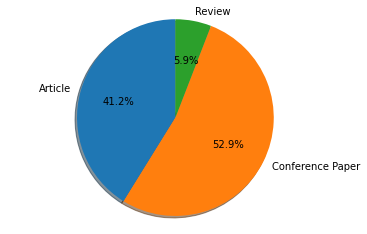

In [33]:
values = [article, conference, review]
labels = "Article", "Conference Paper", "Review"
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
fig1.patch.set_facecolor('white')
ax1.pie(values, explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [34]:
df["Abbreviated Source Title"].unique()

array(['Knowl Based Syst', 'Lect. Notes Comput. Sci.', 'IEEE Access',
       'Sustainability', 'Interfaces',
       'IFIP Advances in Information and Communication Technology',
       'Supply Chain Forum', 'IEEE Symp. Ser. Comput. Intell., SSCI',
       'Proc. - IEEE/ACIS Int. Conf. Softw. Eng., Artif. Intell., Netw. Parallel/Distrib. Comput., SNPD',
       'Proc. - IEEE Int. Conf. Big Data, Big Data',
       'ACM Int. Conf. Proc. Ser.', 'J Test Eval', 'J. Adv. Manag. Res.',
       'Proc. Annu. Hawaii Int. Conf. Syst. Sci., HICSS'], dtype=object)

In [35]:
indexed_kw = []
for index, row in df.iterrows():
    #print(row["Index Keywords"])
    try:
        x = row["Index Keywords"].split("; ")
        indexed_kw.append(x)
    except AttributeError:
        pass

indexed_kw = [j for i in indexed_kw for j in i]


In [51]:
df_kw = pd.DataFrame(indexed_kw, columns=["Indexed Keywords"])
pivot_kw = df_kw.pivot_table(columns=['Indexed Keywords'], aggfunc="size")

<AxesSubplot:xlabel='Indexed Keywords'>

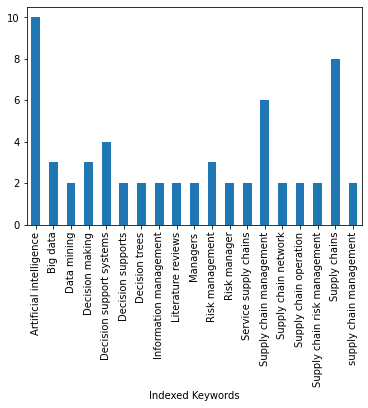

In [52]:
pivot = pivot_kw[pivot_kw > 1]
pivot.plot.bar()

In [53]:
author_kw = []
for index, row in df.iterrows():
    try:
        x = row["Author Keywords"].split("; ")
        author_kw.append(x)
    except AttributeError:
        pass

author_kw = [j for i in author_kw for j in i]

In [56]:
df_kw_au = pd.DataFrame(author_kw, columns=["Author Keywords"])
pivot_kw_au = df_kw_au.pivot_table(columns=['Author Keywords'], aggfunc="size")

<AxesSubplot:xlabel='Author Keywords'>

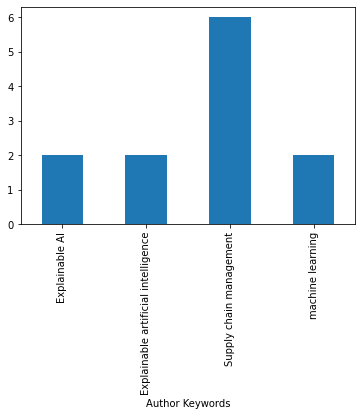

In [57]:
pivot = pivot_kw_au[pivot_kw_au > 1]
pivot.plot.bar()